In [1]:
%matplotlib inline

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

#### Functions used in the study.

In [92]:
# Dataset overview function
def check_df(dataframe, head=5):
    print("######################### SHAPE #########################")
    print(dataframe.shape)
    print("######################### DTYPES #########################")
    print(dataframe.dtypes)
    print("######################### NULL VALUES #########################")
    print(dataframe.isnull().sum())
    print("######################### INFO #########################")
    print(dataframe.info())
    print("######################### HEAD #########################")
    print(dataframe.head(head))
    print("######################### TAIL #########################")
    print(dataframe.tail(head))
    print("######################### DESCRIBE #########################")
    print(dataframe.describe().T)
    
# Check for unique values function
def check_uniques(dataframe):
    for col in dataframe.columns:
        print(' '*20)
        print(col.upper())
        print(dataframe[col].unique())
        
# Plot histogram function
def view_histogram(dataframe, columns = None):    
    num_columns = dataframe.select_dtypes(include=['int64','float64']).columns if columns is None else \
    columns
    
    for col in num_columns:    
        mean_value = dataframe[col]. mean()
        
        plt.figure(figsize=(5,5))
        plt.grid(True)
        plt.title(dataframe[col].name)
        sns.histplot(dataframe[col], kde=True)
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
        plt.legend()
        plt.show()
        
        print('Min:', dataframe[col].min())
        print('Max:', dataframe[col].max())
        print('Mean:', mean_value)
        print('Std:', dataframe[col].std())
        print('Skewness:', dataframe[col].skew())
        print('Kurtosis', dataframe[col].kurt())

# Adult Income Dataset

## Exploratory and Data Analysis

In [3]:
adult_income = pd.read_csv('data/adult.csv')

In [113]:
adult_income

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [89]:
print('Adult Income dataset overview\n')
check_df(adult_income)

Adult Income dataset overview

######################### SHAPE #########################
(48842, 15)
######################### DTYPES #########################
age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object
######################### NULL VALUES #########################
age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64
######################### INFO #############

In [90]:
# Rename the columns contains '-'
adult_income.columns = [col.replace('-', '_') for col in adult_income.columns]

In [91]:
print('Check for unique values')
check_uniques(adult_income)

Check for unique values
                    
AGE
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
                    
WORKCLASS
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
                    
FNLWGT
[226802  89814 336951 ... 129912 255835 257302]
                    
EDUCATION
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
                    
EDUCATIONAL_NUM
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
                    
MARITAL_STATUS
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
                    
OCCUPATION
['Machine-op-inspct' 'Far

### Cleaning dataset

In three features - workclass, occupation, and native_country - there are values '?'.

In [62]:
rows_with_questionmark = adult_income[adult_income.apply(lambda row: '?' in row.values, axis=1)]

In [81]:
round(len(rows_with_questionmark)/len(adult_income)*100, 4)

7.4117

There are 7.4117 percent with '?' symbols as values. The dataset is large enough, so we can remove these rows.

In [69]:
# Replace '?' with 'NaN'
clean_adult_income = adult_income.replace('?',pd.NA,)

In [75]:
clean_adult_income.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational_num       0
marital_status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

In [82]:
# Remove 'NaN' values from dataset
clean_adult_income.dropna(inplace = True)

In [83]:
clean_adult_income.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [78]:
clean_adult_income.shape

(45222, 15)

###  Extracting interesting information from the dataset.

#### Age

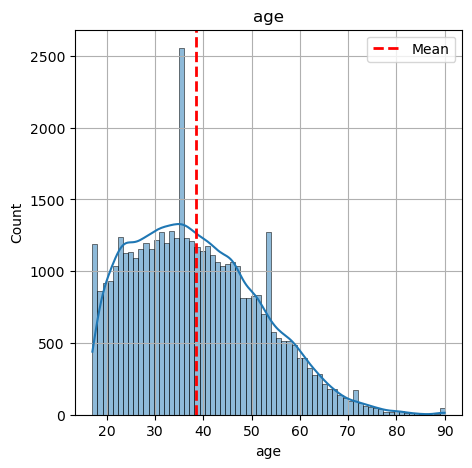

Min: 17
Max: 90
Mean: 38.547941267524656
Std: 13.217870219055524
Skewness: 0.5328158942555791
Kurtosis -0.15587445202596317


In [95]:
# View age histogram of the cleaned dataset
view_histogram(clean_adult_imcome, columns=['age'])

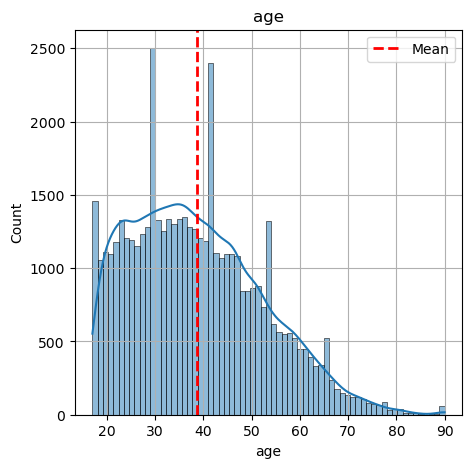

Min: 17
Max: 90
Mean: 38.64358543876172
Std: 13.71050993444322
Skewness: 0.5575803166133181
Kurtosis -0.18426874062387766


In [97]:
# View age histogram of the original dataset
view_histogram(adult_income, columns=['age'])

The comparison between the original and cleaned dataset shows insignificant statistical differences.

In [104]:
# Splitting the data by the mean value.
mean_age = clean_adult_imcome['age'].mean()
below_mean_age = clean_adult_imcome[clean_adult_imcome['age'] < mean_age]
above_mean_age = clean_adult_imcome[clean_adult_imcome['age'] > mean_age]

print('Number of people:')
print('Below mean age ->', len(below_mean_age))
print('Above mean age ->', len(above_mean_age))
print('Ratio ->', len(below_mean_age)/len(above_mean_age))

Number of people:
Below mean age -> 24238
Above mean age -> 20984
Ratio -> 1.1550705299275639


More (around 15.5%) of the working individuals are below the average age.

The distribution has a slight positive skewness, despite the fact that most of the workers are below the average age. This is due to the presence of a certain portion of workers who are in the age range of 60 to 90 years.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


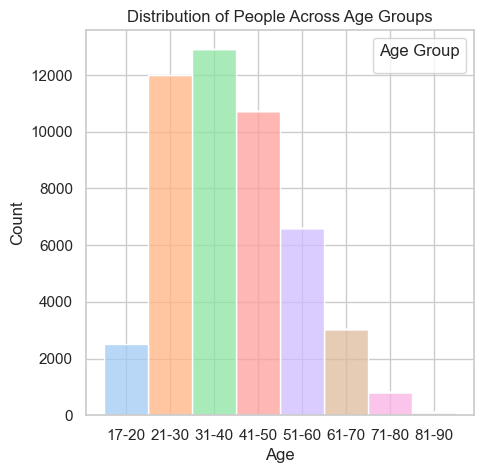

In [112]:
bins = [17, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90',]

sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.histplot(data=adult_income, x=pd.cut(adult_income['age'], bins=bins, labels=labels, right=False), hue=pd.cut(adult_income['age'], bins=bins, labels=labels, right=False), multiple="stack", palette="pastel")

plt.legend(title='Age Group')
plt.title('Distribution of People Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()